<a href="https://colab.research.google.com/github/Tuan-LeHoang/hira_kata_recognition/blob/main/Data_Exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/2023_Project/OCR

/content/drive/MyDrive/2023_Project/OCR


In [6]:
!ls

data			  hira_better_quality	   models
Data_Exploring.ipynb	  hira_better_quality.zip  Train.ipynb
git_lfs_handwritten_hira  __MACOSX


In [22]:
%cd ..

/content/drive/MyDrive/2023_Project/OCR


In [12]:
!ls

hira_better_quality


In [ ]:
# !unzip hira_better_quality.zip

In [40]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4380c24e033f65de06c3fbf6884d37d336a7209ef18d444bfa17087d60e0c264
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


#0. Git clone data

In [5]:
!git clone https://github.com/Tuan-LeHoang/git_lfs_handwritten_hira.git

Cloning into 'git_lfs_handwritten_hira'...
remote: Enumerating objects: 2586, done.
remote: Counting objects: 100% (2586/2586), done.
remote: Compressing objects: 100% (2538/2538), done.
remote: Total 2586 (delta 50), reused 2584 (delta 48), pack-reused 0
Receiving objects: 100% (2586/2586), 10.66 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (2484/2484), done.


#1. Import libs

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from plotly import graph_objs as go
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

#2. EDA

In [19]:
data_path = "./git_lfs_handwritten_hira/hira_better_quality"

In [23]:
patha1 = os.path.join(data_path, "あ/1.jpg")

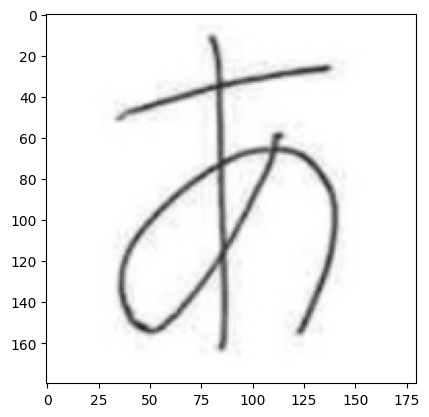

In [24]:
img = mpimg.imread(patha1)
imgplot = plt.imshow(img)
plt.show()

In [25]:
img.shape

(180, 180, 3)

In [26]:
characters = []
number_of_characters = []
for folder in os.listdir(data_path):
    if folder == ".DS_Store":
        continue
    character_folder = os.path.join(data_path, folder)
    number_of_character = len(os.listdir(character_folder))
    characters.append(folder)
    number_of_characters.append(number_of_character)



In [27]:
pd1 = pd.DataFrame({
    "characters": characters,
    "#number" : number_of_characters
})

In [29]:
len(pd1)

46

In [30]:
pd1

,characters,#number
0,あ,54
1,い,54
2,う,54
3,え,54
4,お,54
5,か,54
6,き,54
7,く,54
8,け,54
9,こ,54


In [31]:
pd1["#number"].sum()

2482

In [32]:
pd1.describe()

,#number
count,46.000000
mean,53.956522
std,0.594662
min,51.000000
25%,54.000000
50%,54.000000
75%,54.000000
max,55.000000


#3. Load data

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import cv2

import albumentations as A
from albumentations.pytorch import ToTensorV2

import numpy as np # data processing
import matplotlib.pyplot as plt # Data visualization
from tqdm import tqdm # Progress bar


In [34]:
list_characters_folders = data_path


In [36]:
data = []
for folder in os.listdir(list_characters_folders):
    if folder == ".DS_Store":
        continue
    character_folder = os.path.join(list_characters_folders, folder)

    for character_image in os.listdir(character_folder):
        if character_image == ".DS_Store":
            continue
        character_image_path = os.path.join(character_folder, character_image)
        data.append([character_image_path, folder])

In [37]:
df = pd.DataFrame(data, columns=['file_name','label'])

In [38]:
df

,file_name,label
0,./git_lfs_handwritten_hira/hira_better_quality...,あ
1,./git_lfs_handwritten_hira/hira_better_quality...,あ
2,./git_lfs_handwritten_hira/hira_better_quality...,あ
3,./git_lfs_handwritten_hira/hira_better_quality...,あ
4,./git_lfs_handwritten_hira/hira_better_quality...,あ
...,...,...
2475,./git_lfs_handwritten_hira/hira_better_quality...,ん
2476,./git_lfs_handwritten_hira/hira_better_quality...,ん
2477,./git_lfs_handwritten_hira/hira_better_quality...,ん
2478,./git_lfs_handwritten_hira/hira_better_quality...,ん


In [39]:
len(df)

2480

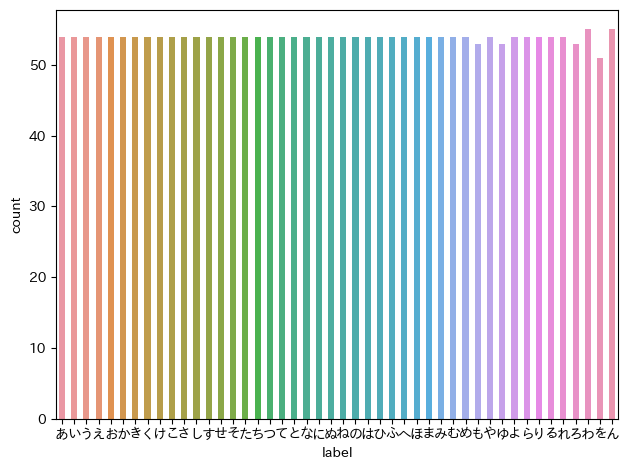

In [41]:
import seaborn as sns
import japanize_matplotlib

sns.countplot(data = df, x = 'label', width = 0.5, orient = "v");
plt.setp(plt.gca().patches, 'alpha', 0.99)  # Decrease bar width
plt.tight_layout()  # Adjust spacing between bars

# Show the plot
plt.show()

In [ ]:
labels = df["label"].sort_values().unique()

In [ ]:
labels

array(['あ', 'い', 'う', 'え', 'お', 'か', 'き', 'く', 'け', 'こ', 'さ', 'し', 'す',
       'せ', 'そ', 'た', 'ち', 'つ', 'て', 'と', 'な', 'に', 'ぬ', 'ね', 'の', 'は',
       'ひ', 'ふ', 'へ', 'ほ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら',
       'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん'], dtype=object)

In [ ]:
a = labels.sort()

In [ ]:
print(a)

None


In [ ]:
type(labels)

numpy.ndarray

In [ ]:
sort_df = df.sort_values(by=["label"])

In [ ]:
sort_df

,file_name,label
0,./data/hira_better_quality/あ/20.jpg,あ
19,./data/hira_better_quality/あ/15.jpg,あ
20,./data/hira_better_quality/あ/9.jpg,あ
21,./data/hira_better_quality/あ/27.jpg,あ
22,./data/hira_better_quality/あ/8.jpg,あ
...,...,...
348,./data/hira_better_quality/ん/29.jpg,ん
349,./data/hira_better_quality/ん/17.jpg,ん
350,./data/hira_better_quality/ん/28.jpg,ん
352,./data/hira_better_quality/ん/31.jpg,ん


In [ ]:
labels = sort_df["label"].unique()

In [ ]:
labels

array(['あ', 'い', 'う', 'え', 'お', 'か', 'き', 'く', 'け', 'こ', 'さ', 'し', 'す',
       'せ', 'そ', 'た', 'ち', 'つ', 'て', 'と', 'な', 'に', 'ぬ', 'ね', 'の', 'は',
       'ひ', 'ふ', 'へ', 'ほ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら',
       'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん'], dtype=object)

##3.2. Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sort_df,
                                      test_size = 0.2,
                                      random_state = 42)

In [ ]:
train_df

,file_name,label
1291,./data/hira_better_quality/の/12.jpg,の
1086,./data/hira_better_quality/や/24.jpg,や
343,./data/hira_better_quality/ん/5.jpg,ん
244,./data/hira_better_quality/ぬ/13.jpg,ぬ
318,./data/hira_better_quality/よ/13.jpg,よ
...,...,...
208,./data/hira_better_quality/め/22.jpg,め
974,./data/hira_better_quality/ら/20.jpg,ら
1215,./data/hira_better_quality/は/28.jpg,は
271,./data/hira_better_quality/わ/22.jpg,わ


In [ ]:
len(test_df)

312

In [ ]:
test_df

#4. Build a Baseline

In [ ]:
from types import SimpleNamespace

cfg = SimpleNamespace(**{})

In [ ]:
cfg

namespace()

In [ ]:
cfg.root_dir = data_path
cfg.image_size = 256

In [ ]:
cfg

namespace(root_dir='./data/hira_better_quality', image_size=256)

In [ ]:
cfg.image_size

256

In [ ]:
cfg.root_dir

'./data/hira_better_quality'

In [ ]:
class CustomDataset(Dataset):
    def __init__(self,
                 cfg,
                 df,
                 transform=None,
                mode = "val"):
        self.root_dir = cfg.root_dir
        self.df = df
        self.file_names = df['file_name'].values
        self.labels = df['label'].values

        if transform:
          self.transform = transform
        else:
          self.transform = A.Compose([
                              A.Resize(cfg.image_size, cfg.image_size),
                              ToTensorV2(),
                           ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Get file_path and label for index
        label = self.labels[idx]
        file_path = os.path.join(self.root_dir, self.file_names[idx])

        # Read an image with OpenCV
        image = cv2.imread(file_path)

        # Convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply augmentations
        augmented = self.transform(image=image)
        image = augmented['image']

        # Normalize because ToTensorV2() doesn't normalize the image
        image = image/255

        return image, label

In [ ]:
cfg.batch_size = 32

In [ ]:
example_dataset = CustomDataset(cfg, df)

example_dataloader = DataLoader(example_dataset,
                              batch_size = cfg.batch_size,
                              shuffle = True,
                              num_workers=0,
                             )

In [ ]:
cv2.imread("./data/hira_better_quality/ん/5.jpg")

In [ ]:
train_dataset = CustomDataset(cfg, train_df)
valid_dataset = CustomDataset(cfg, test_df)

train_dataloader = DataLoader(train_dataset,
                          batch_size = cfg.batch_size,
                          shuffle = True)

valid_dataloader = DataLoader(valid_dataset,
                          batch_size = cfg.batch_size,
                          shuffle = False)

#5. Model

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00


In [ ]:
import timm

cfg.n_classes = len(labels)
cfg.backbone = 'vgg16'

model = timm.create_model(cfg.backbone,
                          pretrained = False,
                          num_classes = cfg.n_classes)

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
timm.list_models("*vgg*")

['repvgg_a2',
 'repvgg_b0',
 'repvgg_b1',
 'repvgg_b1g4',
 'repvgg_b2',
 'repvgg_b2g4',
 'repvgg_b3',
 'repvgg_b3g4',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']

In [ ]:
X = torch.randn(cfg.batch_size, 3, cfg.image_size, cfg.image_size)
y = model(X)

In [ ]:
y.shape

torch.Size([32, 46])

#6. Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
cfg.learning_rate = 1e-4

optimizer = torch.optim.Adam(
  model.parameters(),
  lr = cfg.learning_rate,
  weight_decay = 0,
 )

In [ ]:
cfg.lr_min = 1e-5
cfg.epochs = 5

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
  optimizer,
  T_max = np.ceil(len(train_dataloader.dataset) / cfg.batch_size) * cfg.epochs,
  eta_min = cfg.lr_min
)

In [ ]:
#Metrics for measures the model's performance after the training
from sklearn.metrics import accuracy_score

def calculate_metric(y, y_pred):
  metric = accuracy_score(y, y_pred)
  return metric

#6. Train


In [ ]:
cfg.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_one_epoch(dataloader, model, optimizer, scheduler, cfg):
    # Training mode
    model.train()

    # Init lists to store y and y_pred
    final_y = []
    final_y_pred = []
    final_loss = []

    # Iterate over data
    for step, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        X = batch[0].to(cfg.device)
        y = batch[1].to(cfg.device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            # Forward: Get model outputs
            y_pred = model(X)

            # Forward: Calculate loss
            loss = criterion(y_pred, y)

            # Covert y and y_pred to lists
            y =  y.detach().cpu().numpy().tolist()
            y_pred =  y_pred.detach().cpu().numpy().tolist()

            # Extend original list
            final_y.extend(y)
            final_y_pred.extend(y_pred)
            final_loss.append(loss.item())

            # Backward: Optimize
            loss.backward()
            optimizer.step()

        scheduler.step()

    # Calculate statistics
    loss = np.mean(final_loss)
    final_y_pred = np.argmax(final_y_pred, axis=1)
    metric = calculate_metric(final_y, final_y_pred)

    return metric, loss

In [ ]:
def validate_one_epoch(dataloader, model, cfg):
    # Validation mode
    model.eval()

    final_y = []
    final_y_pred = []
    final_loss = []

    # Iterate over data
    for step, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        X = batch[0].to(cfg.device)
        y = batch[1].to(cfg.device)

        with torch.no_grad():
            # Forward: Get model outputs
            y_pred = model(X)

            # Forward: Calculate loss
            loss = criterion(y_pred, y)

            # Covert y and y_pred to lists
            y =  y.detach().cpu().numpy().tolist()
            y_pred =  y_pred.detach().cpu().numpy().tolist()

            # Extend original list
            final_y.extend(y)
            final_y_pred.extend(y_pred)
            final_loss.append(loss.item())

    # Calculate statistics
    loss = np.mean(final_loss)
    final_y_pred = np.argmax(final_y_pred, axis=1)
    metric = calculate_metric(final_y, final_y_pred)

    return metric, loss

Test using K fold xem ntn z a.

In [ ]:
from sklearn.model_selection import StratifiedKFold

cfg.n_folds = 5

# Create a new column for cross-validation folds
df["kfold"] = -1

# Initialize the kfold class
skf = StratifiedKFold(n_splits=cfg.n_folds)

# Fill the new column
for fold, (train_, val_) in enumerate(skf.split(X = df, y = df.label)):
      df.loc[val_ , "kfold"] = fold

for fold in range(cfg.n_folds):
    train_df = df[df.kfold != fold].reset_index(drop=True)
    valid_df = df[df.kfold == fold].reset_index(drop=True)

In [ ]:
transform_soft = A.Compose([A.Resize(cfg.image_size, cfg.image_size),
                             A.Rotate(p=0.6, limit=[-25,25]),
                            #  A.HorizontalFlip(p = 0.6),
                             A.CoarseDropout(max_holes = 1, max_height = 32, max_width = 32, p=0.3),
                             ToTensorV2()])

In [ ]:
import random

def set_seed(seed=1234):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

    # In general seed PyTorch operations
    torch.manual_seed(seed)

    # If you are using CUDA on 1 GPU, seed it
    torch.cuda.manual_seed(seed)

    # If you are using CUDA on more than 1 GPU, seed them all
    torch.cuda.manual_seed_all(cfg.seed)

    # Certain operations in Cudnn are not deterministic, and this line will force them to behave!
    torch.backends.cudnn.deterministic = True

    # Disable the inbuilt cudnn auto-tuner that finds the best algorithm to use for your hardware.
    torch.backends.cudnn.benchmark = False

In [ ]:
cfg.seed = 42

def fit(model, optimizer, scheduler, cfg, train_dataloader, valid_dataloader=None):
    acc_list = []
    loss_list = []
    val_acc_list = []
    val_loss_list = []

    for epoch in range(cfg.epochs):
        print(f"Epoch {epoch + 1}/{cfg.epochs}")

        set_seed(cfg.seed + epoch)

        acc, loss = train_one_epoch(train_dataloader, model, optimizer, scheduler, cfg)

        if valid_dataloader:
            val_acc, val_loss = validate_one_epoch(valid_dataloader, model, cfg)

        print(f'Loss: {loss:.4f} Acc: {acc:.4f}')
        acc_list.append(acc)
        loss_list.append(loss)

        if valid_dataloader:
            print(f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')
            val_acc_list.append(val_acc)
            val_loss_list.append(val_loss)

    return acc_list, loss_list, val_acc_list, val_loss_list, model

In [ ]:
def visualize_history(acc, loss, val_acc, val_loss):
    fig, ax = plt.subplots(1,2, figsize=(12,4))

    ax[0].plot(range(len(loss)), loss,  color='darkgrey', label = 'train')
    ax[0].plot(range(len(val_loss)), val_loss,  color='cornflowerblue', label = 'valid')
    ax[0].set_title('Loss')

    ax[1].plot(range(len(acc)), acc,  color='darkgrey', label = 'train')
    ax[1].plot(range(len(val_acc)), val_acc,  color='cornflowerblue', label = 'valid')
    ax[1].set_title('Metric (Accuracy)')

    for i in range(2):
        ax[i].set_xlabel('Epochs')
        ax[i].legend(loc="upper right")
    plt.show()

In [ ]:
#Train in K folds

In [ ]:
# for fold in range(cfg.n_folds):
#     train_df = df[df.kfold != fold].reset_index(drop=True)
#     valid_df = df[df.kfold == fold].reset_index(drop=True)

#     train_dataset = CustomDataset(cfg, train_df, transform = transform_soft)
#     valid_dataset = CustomDataset(cfg, valid_df)

#     train_dataloader = DataLoader(train_dataset,
#                               batch_size = cfg.batch_size,
#                               shuffle = True,
#                               num_workers = 0,
#                              )
#     valid_dataloader = DataLoader(valid_dataset,
#                               batch_size = cfg.batch_size,
#                               shuffle = False,
#                               num_workers = 0,
#                              )

#     model = timm.create_model(cfg.backbone,
#                               pretrained = True,
#                               num_classes = cfg.n_classes)

#     model = model.to(cfg.device)

#     criterion = nn.CrossEntropyLoss()

#     optimizer = torch.optim.Adam(model.parameters(),
#                                  lr = cfg.learning_rate,
#                                  weight_decay = 0,
#                                 )

#     scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
#                                                            T_max= np.ceil(len(train_dataloader.dataset) / cfg.batch_size) * cfg.epochs,
#                                                            eta_min=cfg.lr_min)

#     acc, loss, val_acc, val_loss, model, lrs = fit(model, optimizer, scheduler, cfg, train_dataloader, valid_dataloader)

#     visualize_history(acc, loss, val_acc, val_loss)

Epoch 1/5


<ipython-input-82-2fd0430fcfee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm(enumerate(dataloader), total=len(dataloader)):


  0%|          | 0/39 [00:00<?, ?it/s]

error: ignored